<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Data_Cleaning_DAV_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to google drive and import necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change working directory.

In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/DAV Assessment/Cefas_smartbuoy"

/content/drive/My Drive/Colab Notebooks/DAV Assessment/Cefas_smartbuoy


See current files in directory.

In [ ]:
ls

clean_data1.csv  kd_time.png              sal_time.png    WESTGAB_2.csv
clean_data2.csv  o2_time.png              sil_time.png    WESTGAB2.csv
clean_data.csv   oxygen_saturation_data/  temp_time2.png  WESTGAB2PAR.csv
fluors_time.png  par_0_time.png           temp_time.png   WESTGAB.csv
ftu_time.png     par_1_time.png           toxn_time.png   WESTGABPAR.csv
heatMap.png      par_2_time.png           WESTGAB2_2.csv  WG2O2SAT.csv


In [ ]:
westgab = pd.read_csv("WESTGAB.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab.set_index("dateTime", inplace = True)
westgab

,Unnamed: 0,deployment,deployment_group,lat,lon,depth,value,stdev,n,stdev_derived,sensor,sensor_serial,par,unit
dateTime,,,,,,,,,,,,,,
2002-08-28 13:15:00,1,WESTGAB/001,WESTGAB,51.998167,2.079333,1,18.780,0.009917,420.0,NaN,FSI CT Module,1842,TEMP,C
2002-08-28 13:15:00,2,WESTGAB/001,WESTGAB,51.998167,2.079333,1,34.691,0.009830,420.0,NaN,FSI CT Module,1842,SAL,PSS78
2002-08-28 13:15:00,3,WESTGAB/001,WESTGAB,51.998167,2.079333,1,6.420,0.766821,420.0,NaN,Optical Back Scatter,1743,FTU,FTU
2002-08-28 13:15:00,4,WESTGAB/001,WESTGAB,51.998167,2.079333,1,0.620,0.056845,420.0,NaN,Seapoint Chlorophyll Fluorometer,2317,FLUORS,arb. unit
2002-08-28 13:30:00,5,WESTGAB/001,WESTGAB,51.998167,2.079333,1,0.630,0.068598,420.0,NaN,Seapoint Chlorophyll Fluorometer,2317,FLUORS,arb. unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10 06:00:00,884465,WESTGAB/104,WESTGAB,51.980333,2.082833,1,2.870,0.964457,300.0,NaN,Optical Back Scatter\r\r\nCabled sensor,1638,FTU,FTU
2016-05-10 06:00:00,884466,WESTGAB/104,WESTGAB,51.980333,2.082833,1,34.668,0.046799,60.0,NaN,Aanderaa Conductivity Sensor - Type 3919B IW,804,SAL,PSS78
2016-05-10 06:00:00,884467,WESTGAB/104,WESTGAB,51.980333,2.082833,1,10.805,0.017110,60.0,NaN,Aanderaa Conductivity Sensor - Type 3919B IW,804,TEMP,C


Need to deal with encoding errors in order for file to open file. The causes are in the units column and can be ignored. Then we use the dateTime column to be of the date type and use this to index our files.

In [ ]:
westgab = pd.read_csv("WESTGAB.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab.set_index("dateTime", inplace = True)
westgab_2 = pd.read_csv("WESTGAB_2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab_2.set_index("dateTime", inplace = True)
westgabpar = pd.read_csv("WESTGABPAR.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgabpar.set_index("dateTime", inplace = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Now we extract the data associated with seperate parameters ("par") into seperate data frames before re-combining based on date. Then we make sure that our entries are numbers before saving to a csv. For each time point there are 3 different values of PAR corresponding to different 0, 1, and 2 metres depths so we'll make 3 columns for these.

In [ ]:
westgab_temp = westgab[westgab["par"] == "TEMP"]
westgab_temp = westgab_temp["value"]
westgab_temp.name = "temp"
westgab_sal = westgab[westgab["par"] == "SAL"]
westgab_sal = westgab_sal["value"]
westgab_sal.name = "sal"
westgab_ftu = westgab[westgab["par"] == "FTU"]
westgab_ftu = westgab_ftu["value"]
westgab_ftu.name = "ftu"
westgab_fluors = westgab[westgab["par"] == "FLUORS"]
westgab_fluors = westgab_fluors["value"]
westgab_fluors.name = "fluors"
westgab_o2 = westgab[westgab["par"] == "O2CONC"]
westgab_o2 = westgab_o2["value"]
westgab_o2.name = "o2"

westgab_kd = westgab_2[westgab_2["par"] == "Kd"]
westgab_kd = westgab_kd["value"]
westgab_kd.name = "kd"
westgab_tox = westgab_2[westgab_2["par"] == "TOXN"]
westgab_tox = westgab_tox["value"]
westgab_tox.name = "tox"
westgab_sil = westgab_2[westgab_2["par"] == "SILICA"]
westgab_sil = westgab_sil["value"]
westgab_sil.name = "sil"

westgab_par_0 = westgabpar[westgabpar["depth"] == 0]
westgab_par_0 = westgab_par_0["value"]
westgab_par_0.name = "par_0"

westgab_par_1 = westgabpar[westgabpar["depth"] == 1]
westgab_par_1 = westgab_par_1["value"]
westgab_par_1.name = "par_1"

westgab_par_2 = westgabpar[westgabpar["depth"] == 2]
westgab_par_2 = westgab_par_2["value"]
westgab_par_2.name = "par_2"

merge1 = pd.merge(westgab_temp, westgab_sal, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_ftu, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_fluors, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_o2, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_kd, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_tox, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_sil, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_0, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_1, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_2, how = 'outer', left_index = True, right_index = True)

merge1 = merge1.apply(pd.to_numeric, errors = 'raise')
merge1.to_csv("clean_data1.csv", sep = ",", index = "False")

We now do the exact same thing but for WESTGAB2.

In [ ]:
westgab2 = pd.read_csv("WESTGAB2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2.set_index("dateTime", inplace = True)
westgab2_2 = pd.read_csv("WESTGAB2_2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2_2.set_index("dateTime", inplace = True)
westgab2par = pd.read_csv("WESTGAB2PAR.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2par.set_index("dateTime", inplace = True)

In [ ]:
westgab2_temp = westgab2[westgab2["par"] == "TEMP"]
westgab2_temp = westgab2_temp["value"]
westgab2_temp.name = "temp"
westgab2_sal = westgab2[westgab2["par"] == "SAL"]
westgab2_sal = westgab2_sal["value"]
westgab2_sal.name = "sal"
westgab2_ftu = westgab2[westgab2["par"] == "FTU"]
westgab2_ftu = westgab2_ftu["value"]
westgab2_ftu.name = "ftu"
westgab2_fluors = westgab2[westgab2["par"] == "FLUORS"]
westgab2_fluors = westgab2_fluors["value"]
westgab2_fluors.name = "fluors"
westgab2_o2 = westgab2[westgab2["par"] == "O2CONC"]
westgab2_o2 = westgab2_o2["value"]
westgab2_o2.name = "o2"

westgab2_kd = westgab2_2[westgab2_2["par"] == "Kd"]
westgab2_kd = westgab2_kd["value"]
westgab2_kd.name = "kd"
westgab2_tox = westgab2_2[westgab2_2["par"] == "TOXN"]
westgab2_tox = westgab2_tox["value"]
westgab2_tox.name = "tox"
westgab2_sil = westgab2_2[westgab2_2["par"] == "SILICA"]
westgab2_sil = westgab2_sil["value"]
westgab2_sil.name = "sil"

westgab2_par_0 = westgab2par[westgab2par["depth"] == 0]
westgab2_par_0 = westgab2_par_0["value"]
westgab2_par_0.name = "par_0"

westgab2_par_1 = westgab2par[westgab2par["depth"] == 1]
westgab2_par_1 = westgab2_par_1["value"]
westgab2_par_1.name = "par_1"

westgab2_par_2 = westgab2par[westgab2par["depth"] == 2]
westgab2_par_2 = westgab2_par_2["value"]
westgab2_par_2.name = "par_2"

merge2 = pd.merge(westgab2_temp, westgab2_sal, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_ftu, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_fluors, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_o2, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_kd, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_tox, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_sil, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_0, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_1, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_2, how = 'outer', left_index = True, right_index = True)

merge2 = merge2.apply(pd.to_numeric, errors = 'raise')
merge2.to_csv("clean_data2.csv", sep = ",", index = "False")

In [ ]:
df3 = pd.concat([merge1, merge2], axis = 0)
df3.to_csv("clean_data.csv", sep = ",", index = "False")

Now let's read in our data and then add a column of labels for the various construction phases:
0.   Before any windfarm construction ( - 05/10/2009)
1.   During construction of Greater Gabbard (05/10/2009 - 07/09/2012)
2.   Before construction of Greater Galloper (07/09/2012 - Summer 2016) NEED EXACT DATE!
3.   During construction of Greater Galloper (Summer 2016 - March 2018)
4.   After construction of both wind farms (March 2018)





In [ ]:
df = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df["phase"] = 0
df.loc[(df["dateTime"] >= "2009-10-05") & (df['dateTime'] < "2012-09-07"), "phase"] = 1
df.loc[(df["dateTime"] >= "2012-09-07") & (df['dateTime'] < "2015-07-01"), "phase"] = 2
df.loc[(df["dateTime"] >= "2015-07-01") & (df['dateTime'] < "2018-03-01"), "phase"] = 3
df.loc[df["dateTime"] >= "2018-03-01", "phase"] = 4
df = df.set_index("dateTime")
df.to_csv('clean_data.csv', sep = ',', index = 'False')
df

,temp,sal,ftu,fluors,o2,kd,tox,sil,par_0,par_1,par_2,phase
dateTime,,,,,,,,,,,,
2002-08-28 13:15:00,18.78,34.691,6.42,0.62,NaN,0.641,NaN,NaN,NaN,429.3,226.2,0
2002-08-28 13:30:00,18.77,34.666,6.56,0.63,NaN,0.688,NaN,NaN,NaN,475.9,239.1,0
2002-08-28 13:45:00,18.75,34.653,5.69,0.66,NaN,0.682,NaN,NaN,NaN,518.9,262.4,0
2002-08-28 14:00:00,18.75,34.635,5.50,0.69,NaN,0.720,NaN,NaN,NaN,603.9,294.0,0
2002-08-28 14:15:00,18.74,34.628,4.93,0.75,NaN,NaN,NaN,NaN,NaN,570.9,292.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-07 13:30:00,NaN,NaN,NaN,NaN,NaN,0.452,NaN,NaN,NaN,NaN,NaN,4
2019-12-07 14:00:00,NaN,NaN,NaN,NaN,NaN,0.429,NaN,NaN,NaN,NaN,NaN,4
2019-12-07 14:30:00,NaN,NaN,NaN,NaN,NaN,0.422,NaN,NaN,NaN,NaN,NaN,4


Finally we look at the proportion of missing data points for each of the columns. 

In [ ]:
for n in range(1, 12):
  print(f"Percentage of missing {df.columns[n]} values = {100*df.iloc[:, n].isna().sum()/len(df) :.2f}")

Percentage of missing sal values = 15.18
Percentage of missing ftu values = 17.29
Percentage of missing fluors values = 22.24
Percentage of missing o2 values = 68.91
Percentage of missing kd values = 70.38
Percentage of missing tox values = 93.48
Percentage of missing sil values = 99.53
Percentage of missing par_0 values = 72.11
Percentage of missing par_1 values = 60.21
Percentage of missing par_2 values = 58.87
Percentage of missing phase values = 0.00


From this we see that TOXN and SIL values at the least are severly defficient. Plotting these:

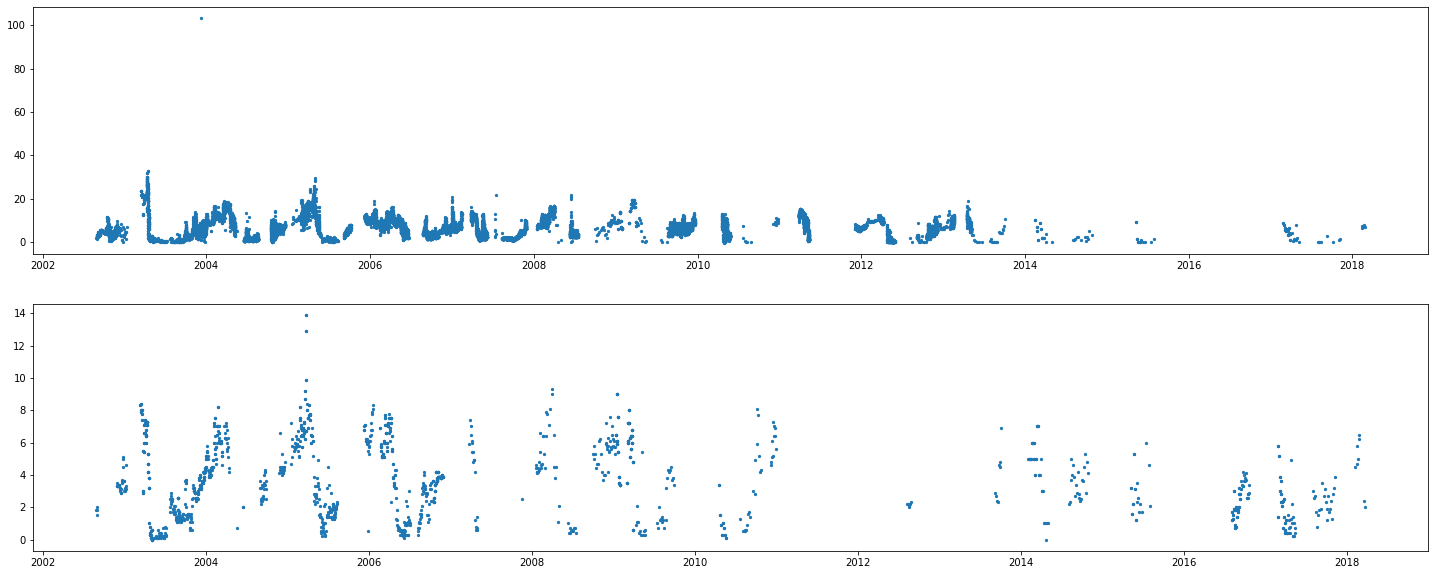

In [ ]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
ax[0].scatter(df1["dateTime"], df1["tox"], s = 5, marker = 'o')
ax[1].scatter(df1["dateTime"], df1['sil'], s = 5, marker = 'o')
fig.show()

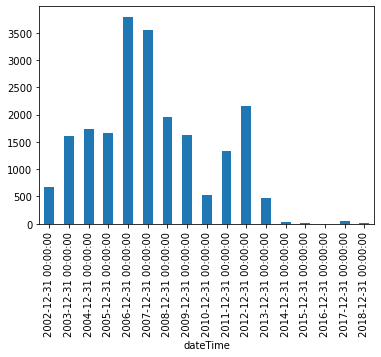

In [ ]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index("dateTime")
df1 = df1['tox']
df1 = df1.dropna()
df1.resample('Y').size().plot.bar()

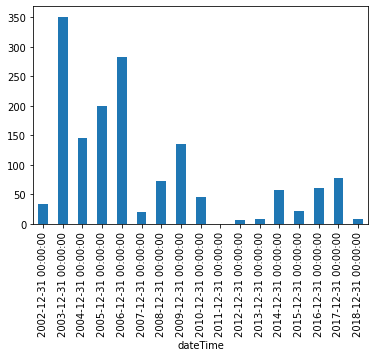

In [ ]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index("dateTime")
df1 = df1['sil']
df1 = df1.dropna()
df1.resample('Y').size().plot.bar()

From these we see that there are large time gaps and so the data is not reliable enough to read into the effects of the offshorewind farm on water quality over time. We remove these columns and overwrite our previous csv.

In [ ]:
df = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df = df.set_index('dateTime')
df = df.drop(columns = ["tox", 'sil'], errors = 'ignore')
df.to_csv('clean_data.csv', sep = ',', index = 'False')

Checking this has worked.

In [ ]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index('dateTime')
df1

,temp,sal,ftu,fluors,o2,kd,par_0,par_1,par_2,phase
dateTime,,,,,,,,,,
2002-08-28 13:15:00,18.78,34.691,6.42,0.62,NaN,0.641,NaN,429.3,226.2,0
2002-08-28 13:30:00,18.77,34.666,6.56,0.63,NaN,0.688,NaN,475.9,239.1,0
2002-08-28 13:45:00,18.75,34.653,5.69,0.66,NaN,0.682,NaN,518.9,262.4,0
2002-08-28 14:00:00,18.75,34.635,5.50,0.69,NaN,0.720,NaN,603.9,294.0,0
2002-08-28 14:15:00,18.74,34.628,4.93,0.75,NaN,NaN,NaN,570.9,292.7,0
...,...,...,...,...,...,...,...,...,...,...
2019-12-07 13:30:00,NaN,NaN,NaN,NaN,NaN,0.452,NaN,NaN,NaN,4
2019-12-07 14:00:00,NaN,NaN,NaN,NaN,NaN,0.429,NaN,NaN,NaN,4
2019-12-07 14:30:00,NaN,NaN,NaN,NaN,NaN,0.422,NaN,NaN,NaN,4
